In [ ]:
#Name :Nalawade Prafulla Chandrashekhar.
#class: B.E.A.I & D.S.
#Roll No:42
#Subject : Deep Learning (CL-IV)

In [ ]:
# Practical No. 3. Design RNN or its variant including LSTM or GRU
# a) Select a suitable time series dataset. Example predict sentiments based on product reviews
# b) Apply for prediction

In [1]:
#Step 1: Import Required Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [2]:
#Step 2: Load and Preprocess the Data
# Load IMDB dataset
vocab_size = 10000  # Limiting vocabulary size
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure equal input length
max_length = 200  # Maximum number of words per review
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
#Step 3: Build the LSTM Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    LSTM(64, return_sequences=False),  # Use GRU(64) instead for GRU model
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (Positive/Negative)
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
#Step 4: Train the Model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 149s 368ms/step - accuracy: 0.7118 - loss: 0.5362 - val_accuracy: 0.8206 - val_loss: 0.4032
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 190s 338ms/step - accuracy: 0.8965 - loss: 0.2600 - val_accuracy: 0.8700 - val_loss: 0.3199
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 131s 336ms/step - accuracy: 0.9320 - loss: 0.1847 - val_accuracy: 0.8644 - val_loss: 0.3802
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 335ms/step - accuracy: 0.9508 - loss: 0.1364 - val_accuracy: 0.8710 - val_loss: 0.3563
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 144s 341ms/step - accuracy: 0.9660 - loss: 0.0941 - val_accuracy: 0.8564 - val_loss: 0.4756


In [9]:
#Step 5: Evaluate the Model
# Evaluate on test data
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.8576 - loss: 0.4812
Test Accuracy: 0.856440007686615


782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step


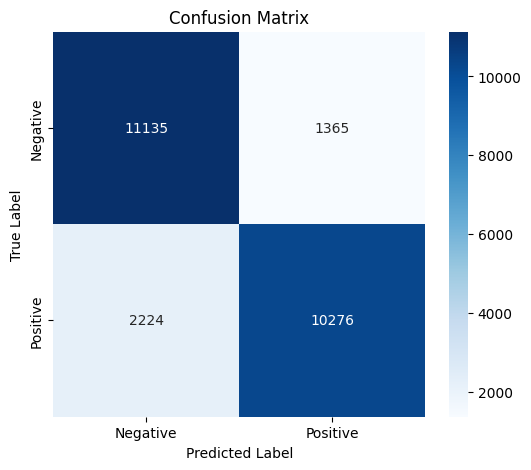

In [11]:
#Step 6: Generate Confusion Matrix
# Predict sentiment labels
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['Negative', 'Positive'],
yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()